In [4]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [14]:
classes = ["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt","Sneaker","Bag","Ankle boot"]

In [11]:
def show_image(i):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[i])

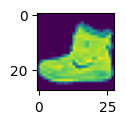

In [12]:
show_image(0)

In [16]:
classes[y_train[0]]

'Ankle boot'

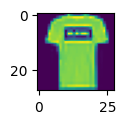

In [13]:
show_image(1)

In [17]:
classes[y_train[1]]

'T-shirt/top'

In [19]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [22]:
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10)

In [24]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled,y_train_categorical, epochs=3)

/home/javedjarif/Desktop/workdir/Tensorflow_Keras/env/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-04-18 17:54:28.469383: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/3


2024-04-18 17:54:29.768339: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7783 - loss: 0.6428
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8595 - loss: 0.3930
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8777 - loss: 0.3437


In [26]:
model.evaluate(X_test_scaled,y_test_categorical)

2024-04-18 17:55:51.110630: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8556 - loss: 0.4061


[0.40699058771133423, 0.8533999919891357]

In [32]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


'Pullover'

In [33]:
classes[y_test[1]]

'Pullover'